### Data Understanding

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [6]:
df= pd.read_csv("C://Users//ASUS//Downloads//Advertising.csv")
df

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


### Data Exploration

In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
df.isna().sum()


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
df.describe()


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


### Analyse data

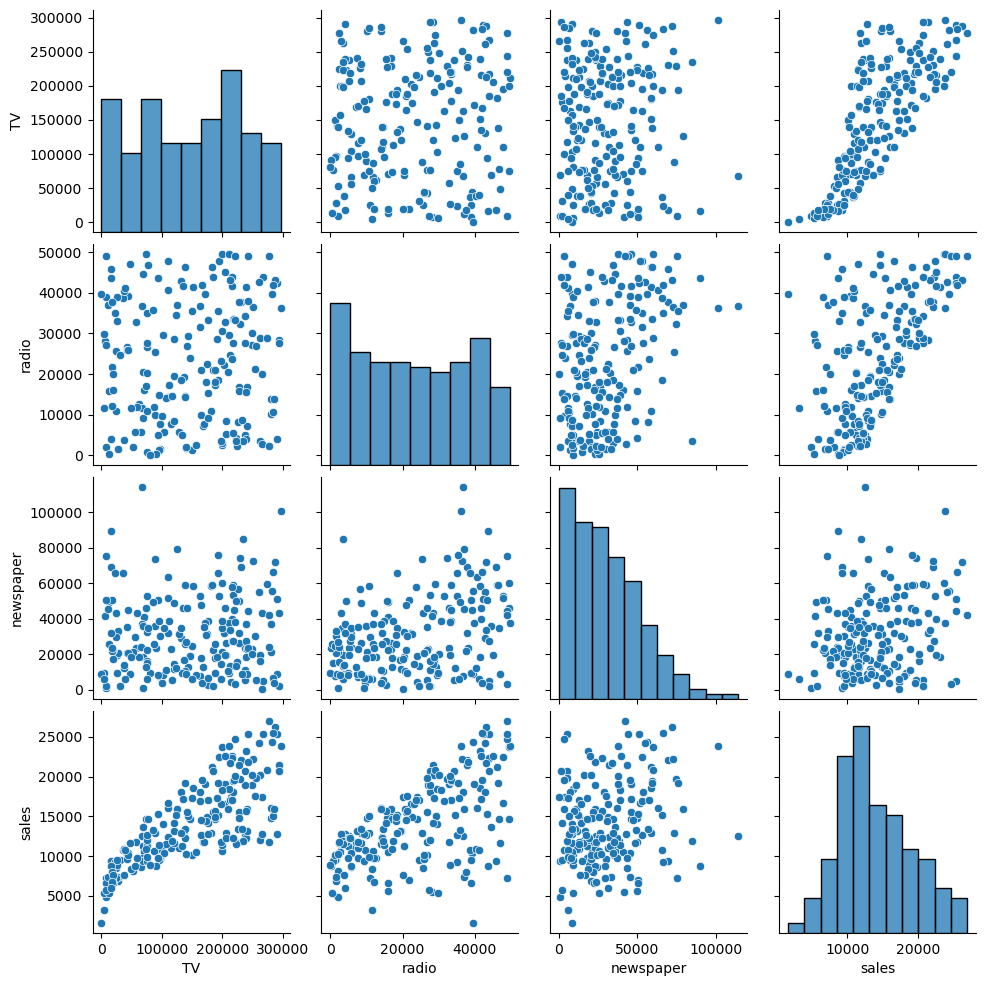

In [11]:
sns.pairplot(df)
plt.show()

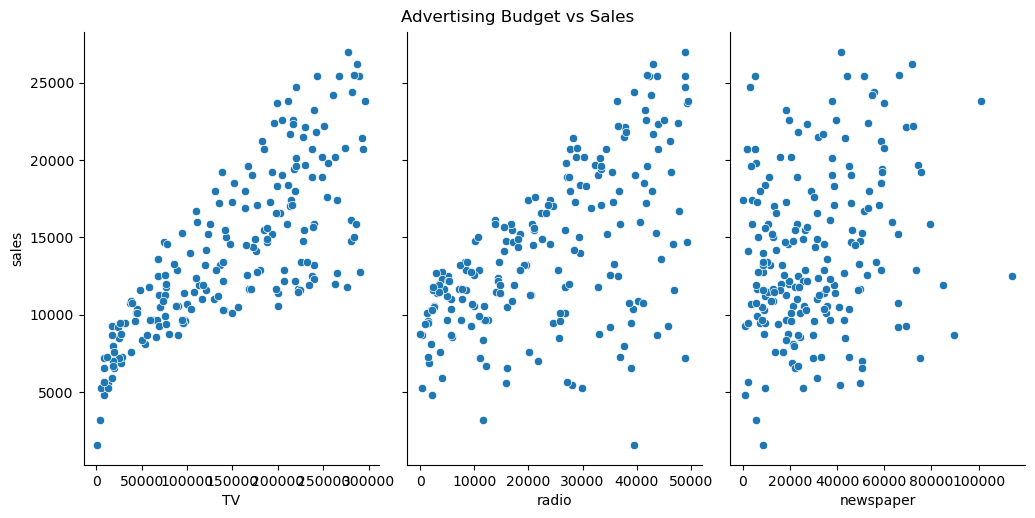

In [27]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=5, aspect=0.7, kind='scatter')
plt.suptitle('Advertising Budget vs Sales', y=1.02)
plt.show()


### Modeling 

In [17]:
from sklearn.preprocessing import StandardScaler


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
model=LinearRegression()


In [29]:
model.fit(X,y)


LinearRegression()

In [25]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df[['TV', 'radio', 'newspaper']]  
y = df['sales']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
# Initializing the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")



Model Evaluation Metrics:
Mean Squared Error (MSE): 3796797.24
Root Mean Squared Error (RMSE): 1948.54
R-squared (R2 Score): 0.86


In [37]:
# Initialize and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"R-squared (R2 Score): {r2_dt:.2f}")



Decision Tree Regressor Evaluation Metrics:
Mean Squared Error (MSE): 1691000.00
Root Mean Squared Error (RMSE): 1300.38
R-squared (R2 Score): 0.94


In [39]:
# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2 Score): {r2_rf:.2f}")



Random Forest Regressor Evaluation Metrics:
Mean Squared Error (MSE): 465908.80
Root Mean Squared Error (RMSE): 682.58
R-squared (R2 Score): 0.98


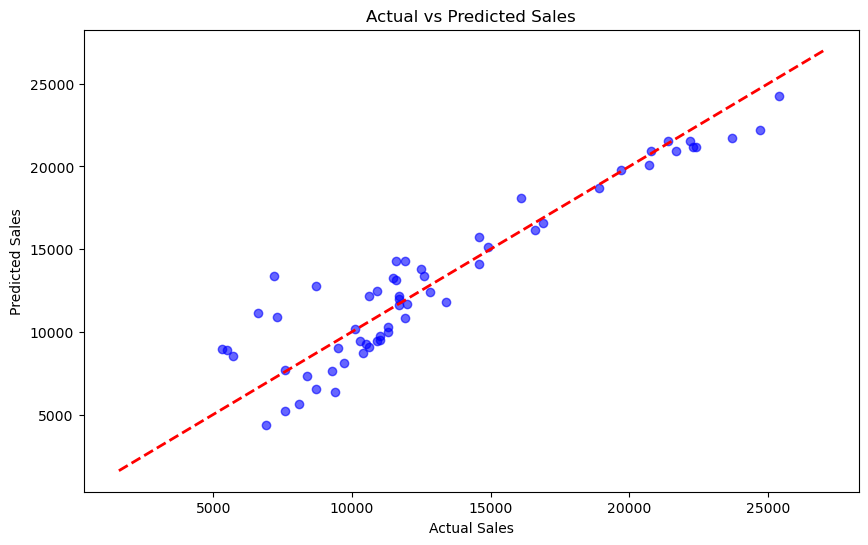

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


In [45]:
import joblib

# Save the model
joblib.dump(model, 'sales_pre_model.pkl')


['sales_pre_model.pkl']